In [32]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_cluster.fit_predict(X)


In [33]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette score for the clusters is:", silhouette_avg)


The average silhouette score for the clusters is: 0.5543236611296419


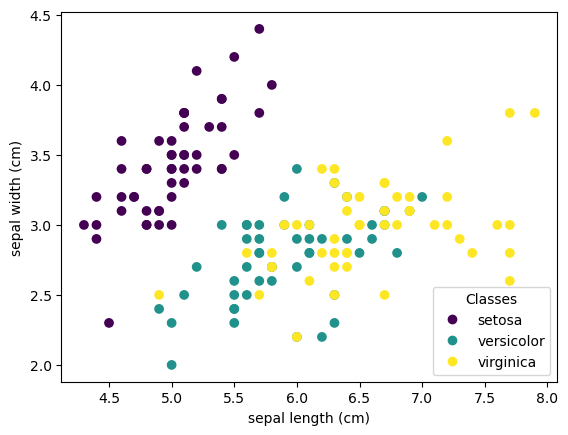

In [37]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


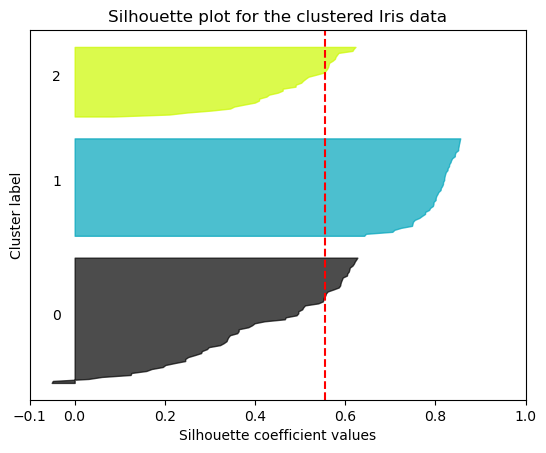

In [36]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Plotting
fig, ax = plt.subplots()
y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette plot for the clustered Iris data")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


In [43]:
# q2.2
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select the "petal width" and "petal length" features
X = df[['petal width (cm)', 'petal length (cm)']]


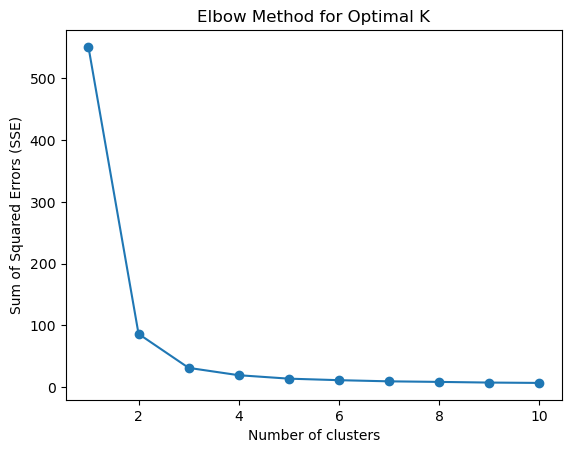

In [44]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of clusters to try
k_range = range(1, 11)
sse = []

# Perform K-means clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [46]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select the "petal width" and "petal length" features
X = df[['petal width (cm)', 'petal length (cm)']]

In [47]:
from sklearn.cluster import KMeans

# Specify the number of clusters (use the optimal value obtained from the Elbow method or any other method)
num_clusters = 3

# Initialize KMeans object with K-means++ initialization
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Perform K-means clustering
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

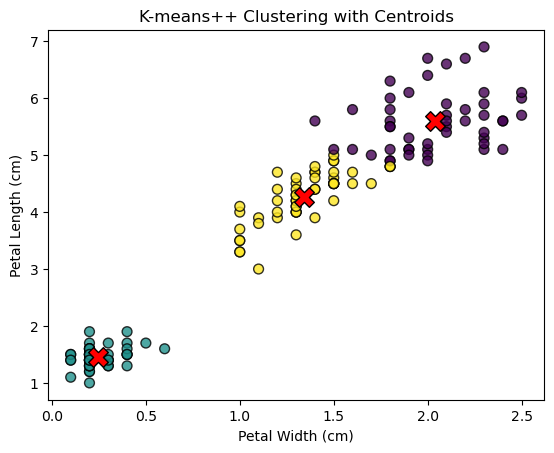

In [48]:
import matplotlib.pyplot as plt

# Plot the clustered data points
plt.scatter(X['petal width (cm)'], X['petal length (cm)'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.8)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, edgecolor='k')

# Add labels and title
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-means++ Clustering with Centroids')

# Show plot
plt.show()


In [50]:
from sklearn.cluster import DBSCAN

# Specify the parameters for DBSCAN
epsilon_1 = 0.2
min_samples = 4

# Initialize DBSCAN object
dbscan_1 = DBSCAN(eps=epsilon_1, min_samples=min_samples)

# Perform DBSCAN clustering
cluster_labels_1 = dbscan_1.fit_predict(X)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  2 -1  2 -1  1 -1 -1 -1  1  1  2  1  3  3 -1 -1 -1  1
  2  1 -1  1  2 -1  1  1  2 -1 -1 -1  2  1 -1  2  2 -1  1  2  2  3  1  2
  2  3  1  1  2  1]


In [55]:
# Specify the parameters for DBSCAN
epsilon_2 = 0.5

# Initialize DBSCAN object
dbscan_2 = DBSCAN(eps=epsilon_2, min_samples=min_samples)

# Perform DBSCAN clustering
cluster_labels_2 = dbscan_2.fit_predict(X)
print(cluster_labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


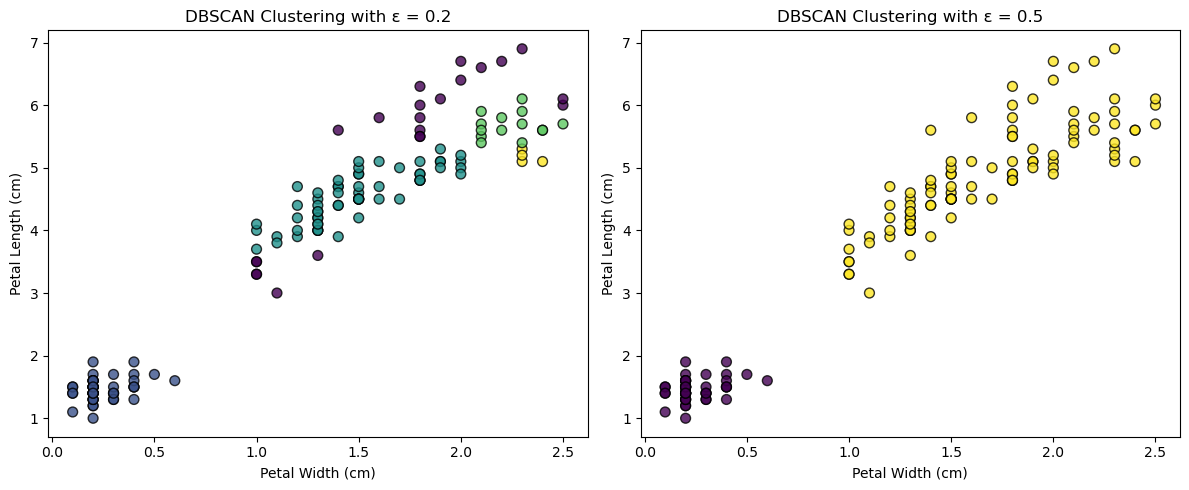

In [52]:
import matplotlib.pyplot as plt

# Plot the clustered data points for ε = 0.2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['petal width (cm)'], X['petal length (cm)'], c=cluster_labels_1, cmap='viridis', edgecolor='k', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering with ε = {epsilon_1}')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

# Plot the clustered data points for ε = 0.5
plt.subplot(1, 2, 2)
plt.scatter(X['petal width (cm)'], X['petal length (cm)'], c=cluster_labels_2, cmap='viridis', edgecolor='k', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering with ε = {epsilon_2}')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

plt.tight_layout()
plt.show()